In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Formulas

Gradient Descend works for all linear and non-linear functions

In [43]:
def GradientDescend(x,y, alpha=0.01, iterations = 100):

    def ComputeGradient(x,y,w,b):

        m = x.shape[0]
        
        error = np.dot(x,w) + b - y
        error2 = np.sum(error**2) / 2 / m

        dJ_dw = np.dot(error,x) / m
        dJ_db = np.sum(error) / m

        return dJ_dw, dJ_db, error2

    # init values

    if x.ndim==2:
        w = np.zeros_like(x[0])
    else:
        w = 0
        

    b = 0
    i = 0
    log = []

    # descend

    while i < iterations:

        dJ_dw, dJ_db, error2 = ComputeGradient(x,y,w,b)

        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db

        log.append([i,[w,b],[dJ_dw,dJ_db],error2])

        i += 1

    log = np.array(log,dtype=object)

    return w,b,log

# Linear model on non-linear data

In [44]:
x = np.arange(0,20,1)
y = x**2

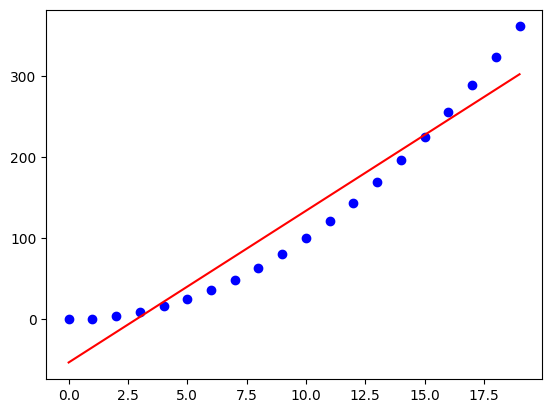

In [45]:
w,b,log = GradientDescend(x,y,1e-2,1000)
prediction = x*w+b
plt.scatter(x,y,c='b')
plt.plot(x,prediction,c='r')

In [46]:
w,b

(18.692815346570878, -53.01525382317323)

# Non-linearity (basic)

$ y = w_0x_0^2+b $

In [47]:
x = np.arange(0,20,1)
y = 1 + x**2

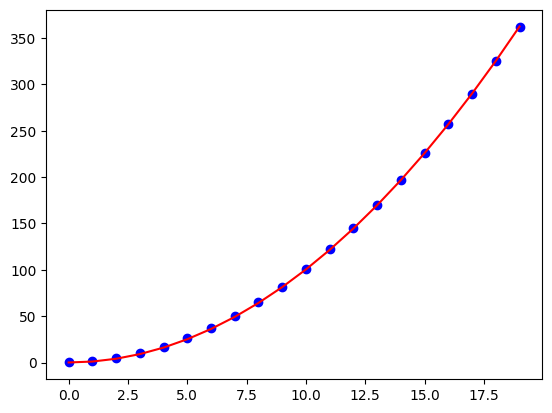

In [48]:
w,b,log = GradientDescend(x**2,y,1e-5,10000)
prediction = (x**2)*w+b
plt.scatter(x,y,c='b')
plt.plot(x,prediction,c='r')

In [49]:
w,b

(1.0041749387228514, 0.04896443659681638)

# Non-linearity (middle)

$ y = w_0x_0+w_1x_1^2+w_2x_2^3+b $

In [55]:
x_complex = np.c_[x,x**2,x**3]
y_complex = x**2

w, b, log = GradientDescend(x_complex, y_complex, iterations=10000, alpha = 1e-7)
w, b

(array([0.08237526, 0.53552137, 0.02752216]), 0.01056185052956357)

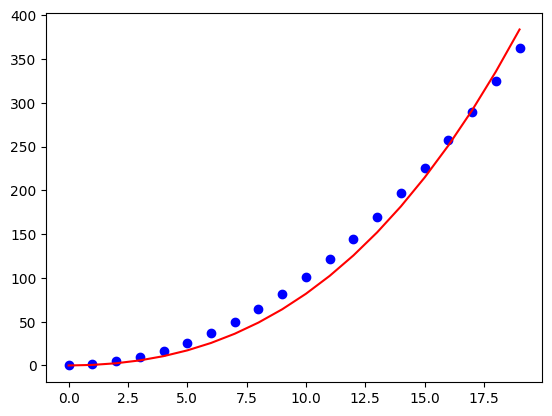

In [57]:
prediction = np.dot(x_complex,w)+b
plt.scatter(x,y,c='b')
plt.plot(x,prediction,c='r')

# Non linearity with feature scaling

In [60]:
def ScaleFeatures(x):
    mean = []
    stdev = []

    k = x.shape[1]

    for i in range(k):
        mean.append(np.mean(x[:,i]))
        stdev.append(np.std(x[:,i]))
    x_scaled = (x - mean) / stdev

    return x_scaled, mean, stdev

In [62]:
x_scaled, _, _ = ScaleFeatures(x_complex)
w, b, log = GradientDescend(x_scaled, y, iterations=100000, alpha = 1e-1)
w, b

(array([5.26616826e-05, 1.13494579e+02, 8.43238778e-05]), 124.49999999999994)

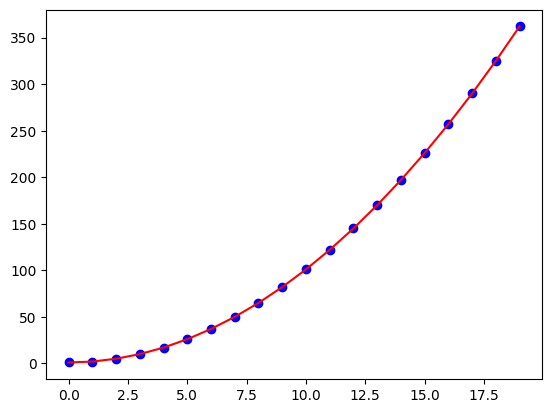

In [63]:
prediction = np.dot(x_scaled,w)+b
plt.scatter(x,y,c='b')
plt.plot(x,prediction,c='r')

# Non-linearity (hardcore)

$y=cos(x/2)$

In [64]:
x = np.arange(0,20,1)
y = np.cos(x/2)

x_train = np.c_[x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10,x**11,x**12,x**13]
x_scaled, _, _ = ScaleFeatures(x_train)

w, b, log = GradientDescend(x_scaled, y, iterations=1000000, alpha = 1e-1)
w, b

(array([ -1.33565562, -10.00231728,  24.77799625,   5.96170981,
        -12.48587921, -16.26275994,  -9.50807133,   0.59194813,
          8.70295901,  11.9412625 ,   9.27097351,   0.78896901,
        -12.81745188]),
 -0.007287194855839288)

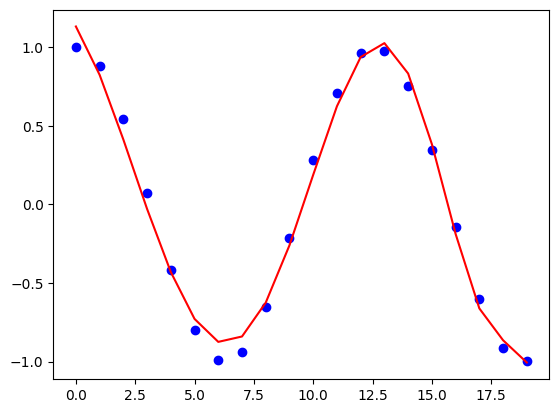

In [65]:
prediction = np.dot(x_scaled,w)+b
plt.scatter(x,y,c='b')
plt.plot(x,prediction,c='r')